In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
with open('run-metrics.json', 'r') as f:
    data = json.load(f)
print(data)

{'variance_metrics': {'full_set_var_sum': 0.8287742733955383, 'full_set_var_values': [0.042914871126413345, 0.039469677954912186, 0.03284400328993797, 0.026410678401589394, 0.023141400888562202, 0.020842518657445908, 0.02040049619972706, 0.019507339224219322, 0.01699874922633171, 0.016653388738632202, 0.015358530916273594, 0.014542898163199425, 0.01401591394096613, 0.013581776060163975, 0.01315335277467966, 0.012589612975716591, 0.012149730697274208, 0.011766556650400162, 0.011166099458932877, 0.01101902686059475, 0.010483733378350735, 0.010298370383679867, 0.009951316751539707, 0.009617923758924007, 0.009296365082263947, 0.008965474553406239, 0.00877675972878933, 0.008761071600019932, 0.008667903952300549, 0.00832656491547823, 0.008302870206534863, 0.00815119780600071, 0.008092078380286694, 0.007735959254205227, 0.007687735836952925, 0.007464346010237932, 0.007402168121188879, 0.0070726568810641766, 0.007013342343270779, 0.006883915048092604, 0.006682680919766426, 0.006662210915237665

In [3]:
variance_metrics = data['variance_metrics']
modelling_metrics = data['modelling_metrics']

In [9]:
r2_values = variance_metrics['r2_values']
mn = min(variance_metrics['r2_values'])
mx = max(variance_metrics['r2_values'])

norm = mx - mn

scaled_r2_values = [(val - mn)/norm for val in r2_values]
scaled_r2_values

[0.0,
 0.525040039205042,
 0.7287788181112878,
 0.8216723069987084,
 0.8785421190820201,
 0.9238949630071897,
 0.9530136767102853,
 0.9653089577640056,
 0.9822811024043215,
 1.0]

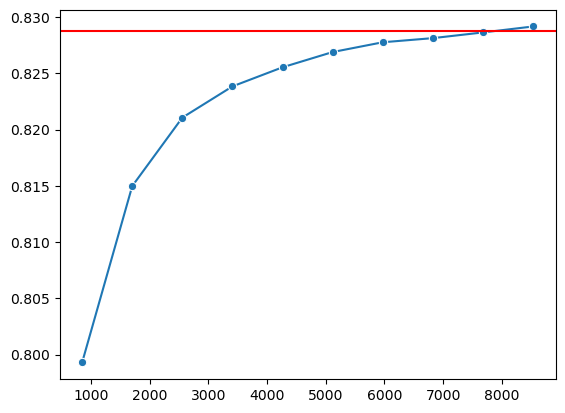

In [18]:
graph = sns.lineplot(x=variance_metrics['subset_sizes'], y=variance_metrics['r2_values'], marker="o")
graph.axhline(variance_metrics['full_set_var_sum'], color='red')
plt.show()

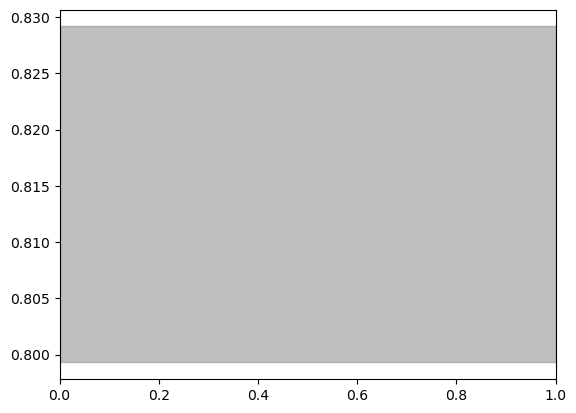

In [19]:
y_values = variance_metrics['r2_values']
lower_bound = min(y_values)
upper_bound = max(y_values)

plt.axhspan(lower_bound, upper_bound, color='gray', alpha=0.5)
plt.show()

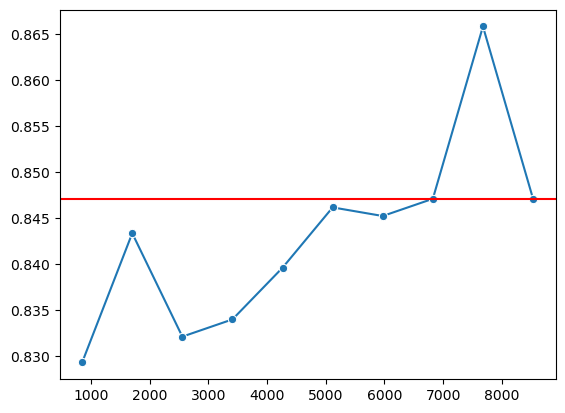

In [5]:
graph = sns.lineplot(x=modelling_metrics['subset_size'], y=modelling_metrics['test_accuracies'], marker="o")
graph.axhline(modelling_metrics['test_accuracies'][-1], color='red')
plt.show()

In [6]:
modelling_metrics['test_accuracies']

[0.8292682926829268,
 0.8433395872420263,
 0.8320825515947468,
 0.8339587242026266,
 0.8395872420262664,
 0.8461538461538461,
 0.8452157598499062,
 0.8470919324577861,
 0.8658536585365854,
 0.8470919324577861]

In [7]:
modelling_metrics['subset_size']

[853, 1706, 2559, 3412, 4265, 5118, 5971, 6824, 7677, 8530]

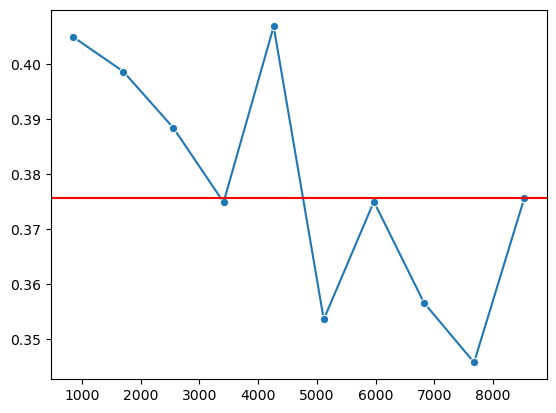

In [8]:
graph = sns.lineplot(x=modelling_metrics['subset_size'], y=modelling_metrics['test_losses'], marker="o")
graph.axhline(modelling_metrics['test_losses'][-1], color='red')
plt.show()

In [12]:
test_accuracies = modelling_metrics['test_accuracies']
mn = min(test_accuracies)
mx = max(test_accuracies)

norm = mx - mn

scaled_acc_values = [(val - mn)/norm for val in test_accuracies]
scaled_acc_values

[0.0,
 0.384615384615386,
 0.07692307692307902,
 0.12820512820512867,
 0.28205128205128366,
 0.461538461538462,
 0.4358974358974357,
 0.48717948717948834,
 1.0,
 0.48717948717948834]

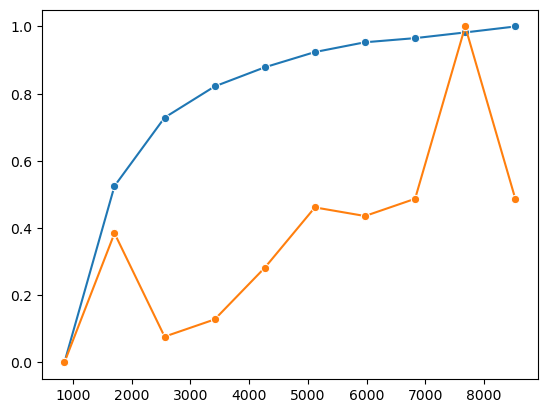

In [13]:
sns.lineplot(x=variance_metrics['subset_sizes'], y=scaled_r2_values, marker="o")
sns.lineplot(x=variance_metrics['subset_sizes'], y=scaled_acc_values, marker="o")
plt.show()

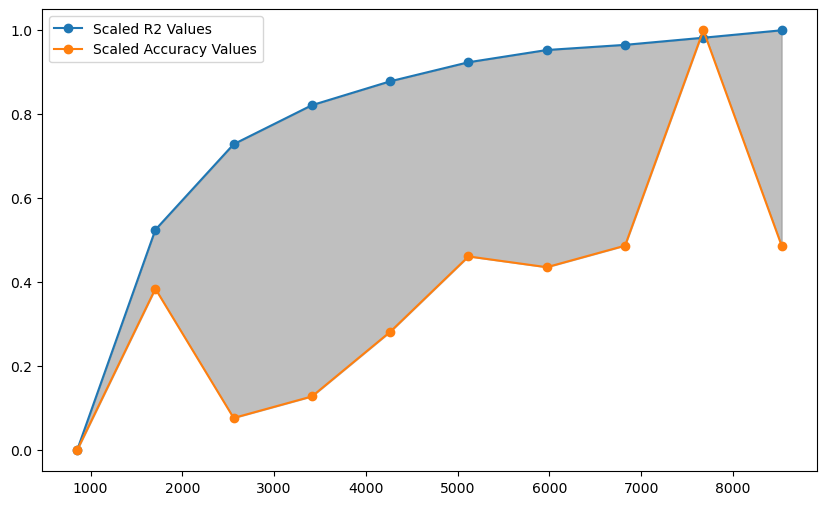

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(variance_metrics['subset_sizes'], scaled_r2_values, marker="o", label='Scaled R2 Values')
plt.plot(variance_metrics['subset_sizes'], scaled_acc_values, marker="o", label='Scaled Accuracy Values')
plt.fill_between(variance_metrics['subset_sizes'], scaled_r2_values, scaled_acc_values, color='gray', alpha=0.5)
plt.legend()
plt.show()

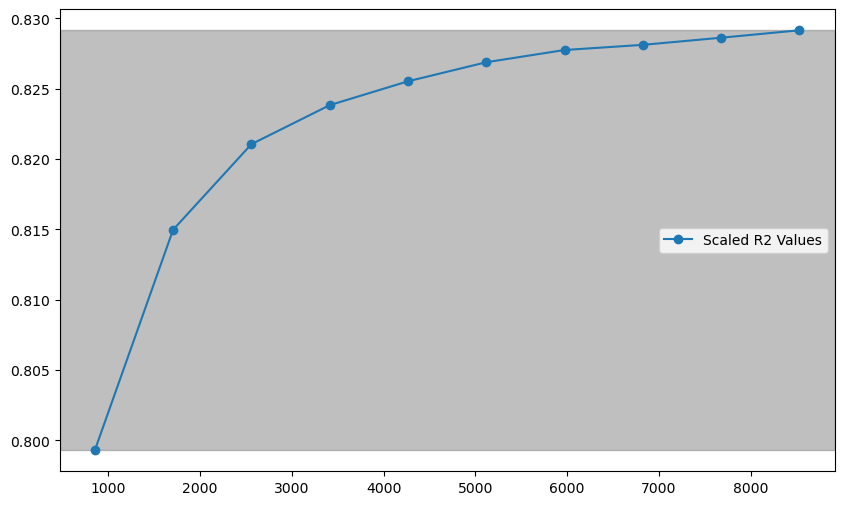

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(variance_metrics['subset_sizes'], variance_metrics['r2_values'], marker="o", label='Scaled R2 Values')
lower_bound = min(variance_metrics['r2_values'])
upper_bound = max(variance_metrics['r2_values'])
plt.axhspan( lower_bound, upper_bound, color='gray', alpha=0.5)
plt.legend()
plt.show()